In [16]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


<h1> Problem 1: Clustering</h1>

<b> Problem Statement :</b> A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage

## Objectives

Main task is to cluster the customers by the factors (spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt and max_spent_in_single_shopping to present the solution. The following approach is suggested :

- Starting with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis .

- **Outlier Analysis:** Outlier Analysis is performed on the dataset to identify outliers and treat them.

- **Scaling Data:** Observe the weightage and varainces for clusters and normalize data using scaling technique.

- Apply Hierarchical clustering and K-Means Clustering on this dataset to create the clusters. 

- Perform visualisations on the clusters that have been formed by plotting a scatter plot.

- Analyse the clusters to data set and recommend accordingly.


In [17]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [19]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [20]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [21]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [22]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster



***
<h1><div style="text-align: Left">Analysis and Solutions</div></h1>


***
<h2>1.1 Read the data and do exploratory data analysis. Describe the data briefly.</h2>
<br>
<h3>Solution:</h3>

In [23]:
#Data Loading
bank=pd.read_csv('NetFlix Data.csv',encoding='latin-1')
bank.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [9]:
print(color.BOLD + color.DARKCYAN+'This dataset contains spendings & balance information of customers.')

This dataset contains spendings & balance information of customers.


<h2> Data Inspection </h2>

In [27]:
bank.info()
print("\n")
print("Check for null values:")
print(bank.isnull().sum())
print("\n")

print(color.BOLD + color.DARKCYAN+'Dataset has',bank.shape[0],'rows and',bank.shape[1],'columns.')
print(color.BOLD + color.DARKCYAN+'Dataset has 7 columns of float datatype and there are no null values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1682 non-null   int64  
 1   Title             1682 non-null   object 
 2   ReleaseDate       1681 non-null   object 
 3   VideoReleaseDate  0 non-null      float64
 4   IMDB              1679 non-null   object 
 5   Unknown           1682 non-null   int64  
 6   Action            1682 non-null   int64  
 7   Adventure         1682 non-null   int64  
 8   Animation         1682 non-null   int64  
 9   Childrens         1682 non-null   int64  
 10  Comedy            1682 non-null   int64  
 11  Crime             1682 non-null   int64  
 12  Documentary       1682 non-null   int64  
 13  Drama             1682 non-null   int64  
 14  Fantasy           1682 non-null   int64  
 15  FilmNoir          1682 non-null   int64  
 16  Horror            1682 non-null   int64  


In [28]:
print(color.BOLD + color.DARKCYAN+'Dataset has',bank.duplicated().sum(),'duplicates.')

Dataset has 0 duplicates.


In [29]:
bank.describe(include="all")

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
count,1682.000000,1682,1681,0.0,1679,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
unique,NaN,1664,240,NaN,1660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sliding Doors (1998),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?That%20Darn%20Cat%20(1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,215,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,841.500000,NaN,NaN,NaN,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,NaN,NaN,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
print(color.BOLD+"Unique values per column in dataset :\n")
for column in bank:
    print(color.BOLD+color.DARKCYAN,column.upper(),': ',bank[column].nunique())
    print(color.BOLD+color.DARKCYAN,bank[column].value_counts().sort_values())
    print('\n')

Unique values per column in dataset :

 ID :  1682
 1681    1
1673    1
1671    1
1669    1
1667    1
       ..
24      1
50      1
52      1
46      1
2       1
Name: ID, Length: 1682, dtype: int64


 TITLE :  1664
 Ponette (1996)                     1
Hercules (1997)                    1
Free Willy 3: The Rescue (1997)    1
Just Cause (1995)                  1
City of Industry (1997)            1
                                  ..
Hurricane Streets (1998)           2
Kull the Conqueror (1997)          2
Ice Storm, The (1997)              2
Chasing Amy (1997)                 2
Sliding Doors (1998)               2
Name: Title, Length: 1664, dtype: int64


 RELEASEDATE :  240
 28-Feb-1996    1  
22-May-1996    1  
15-Dec-1996    1  
17-May-1975    1  
17-May-1996    1  
              ..  
01-Jan-1992    37 
01-Jan-1997    98 
01-Jan-1993    126
01-Jan-1994    213
01-Jan-1995    215
Name: ReleaseDate, Length: 240, dtype: int64


 VIDEORELEASEDATE :  0
 Series([], Name: VideoReleaseDate

<h2>Exploratory Data Analytics</h2>

<Figure size 576x396 with 0 Axes>

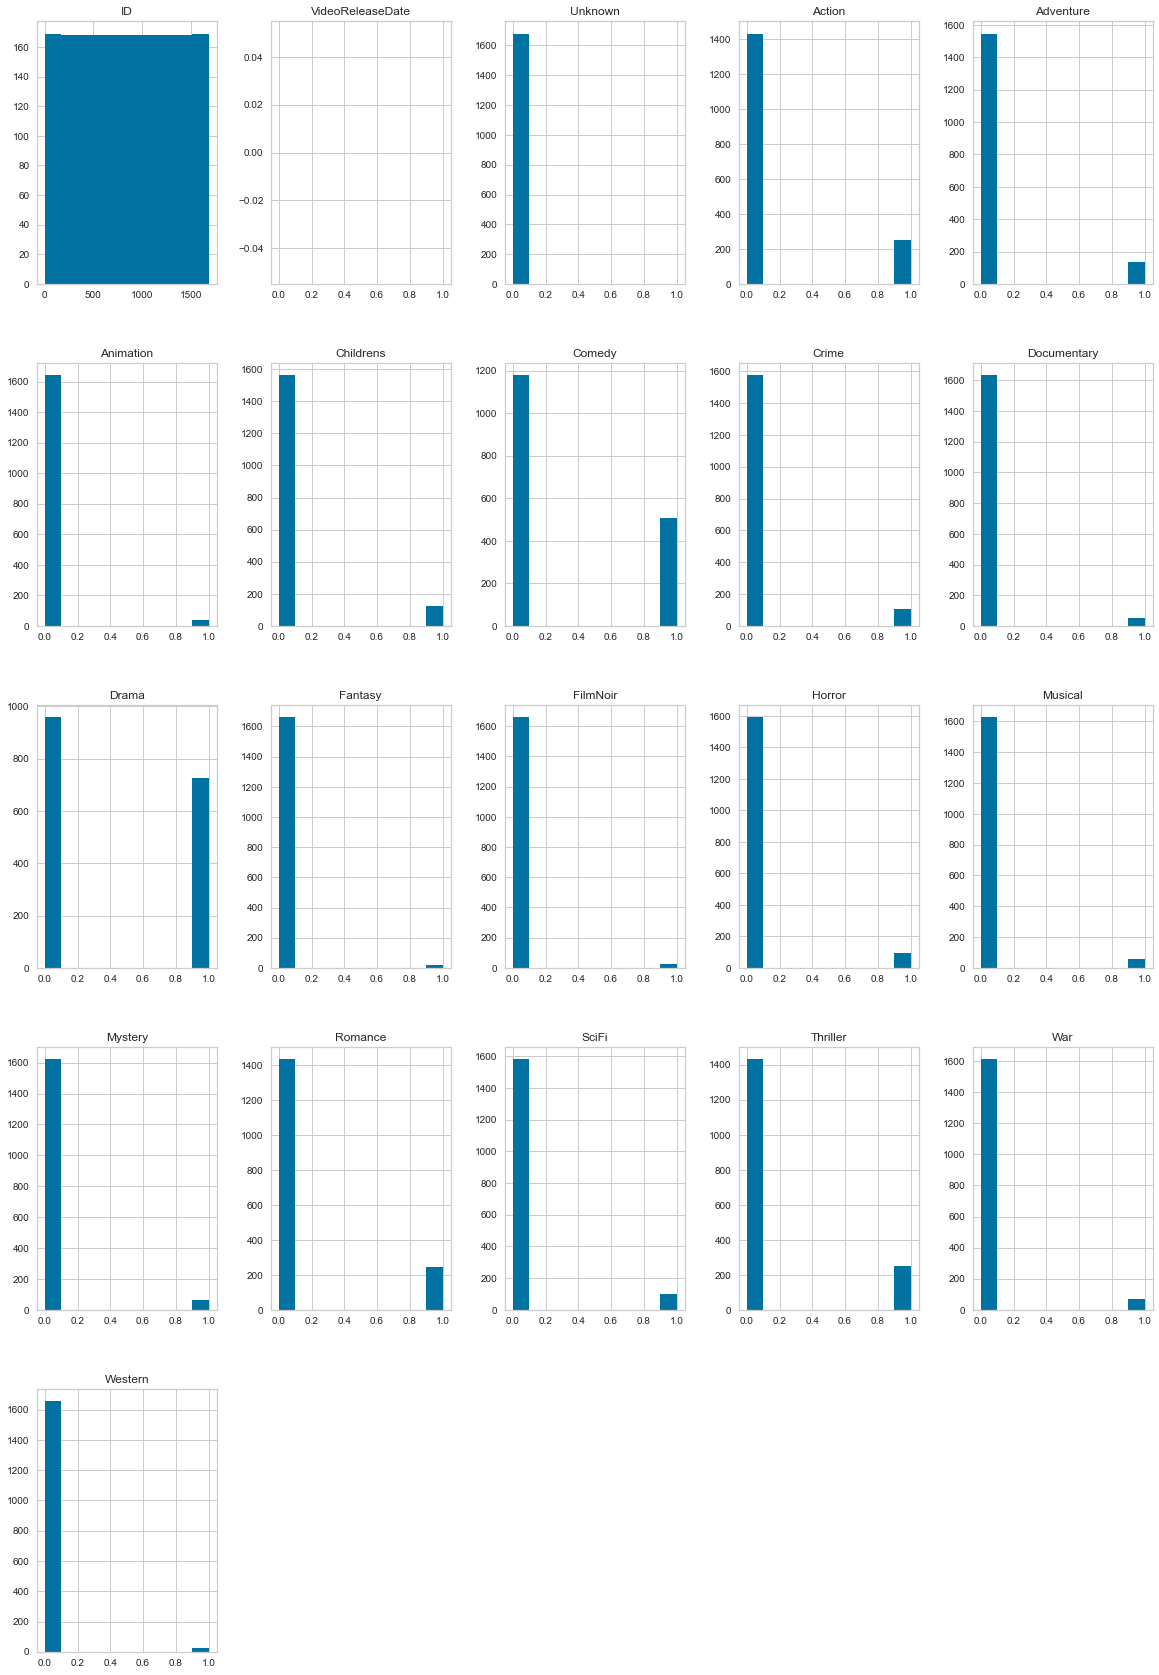

In [15]:
plt.tight_layout()
bank.hist(figsize=(20,30))
plt.show()

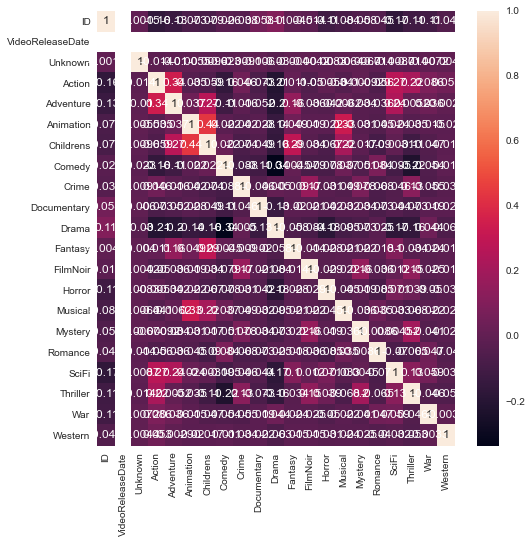

In [16]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (8, 8))
sns.heatmap(bank.corr(), annot = True)
plt.show()

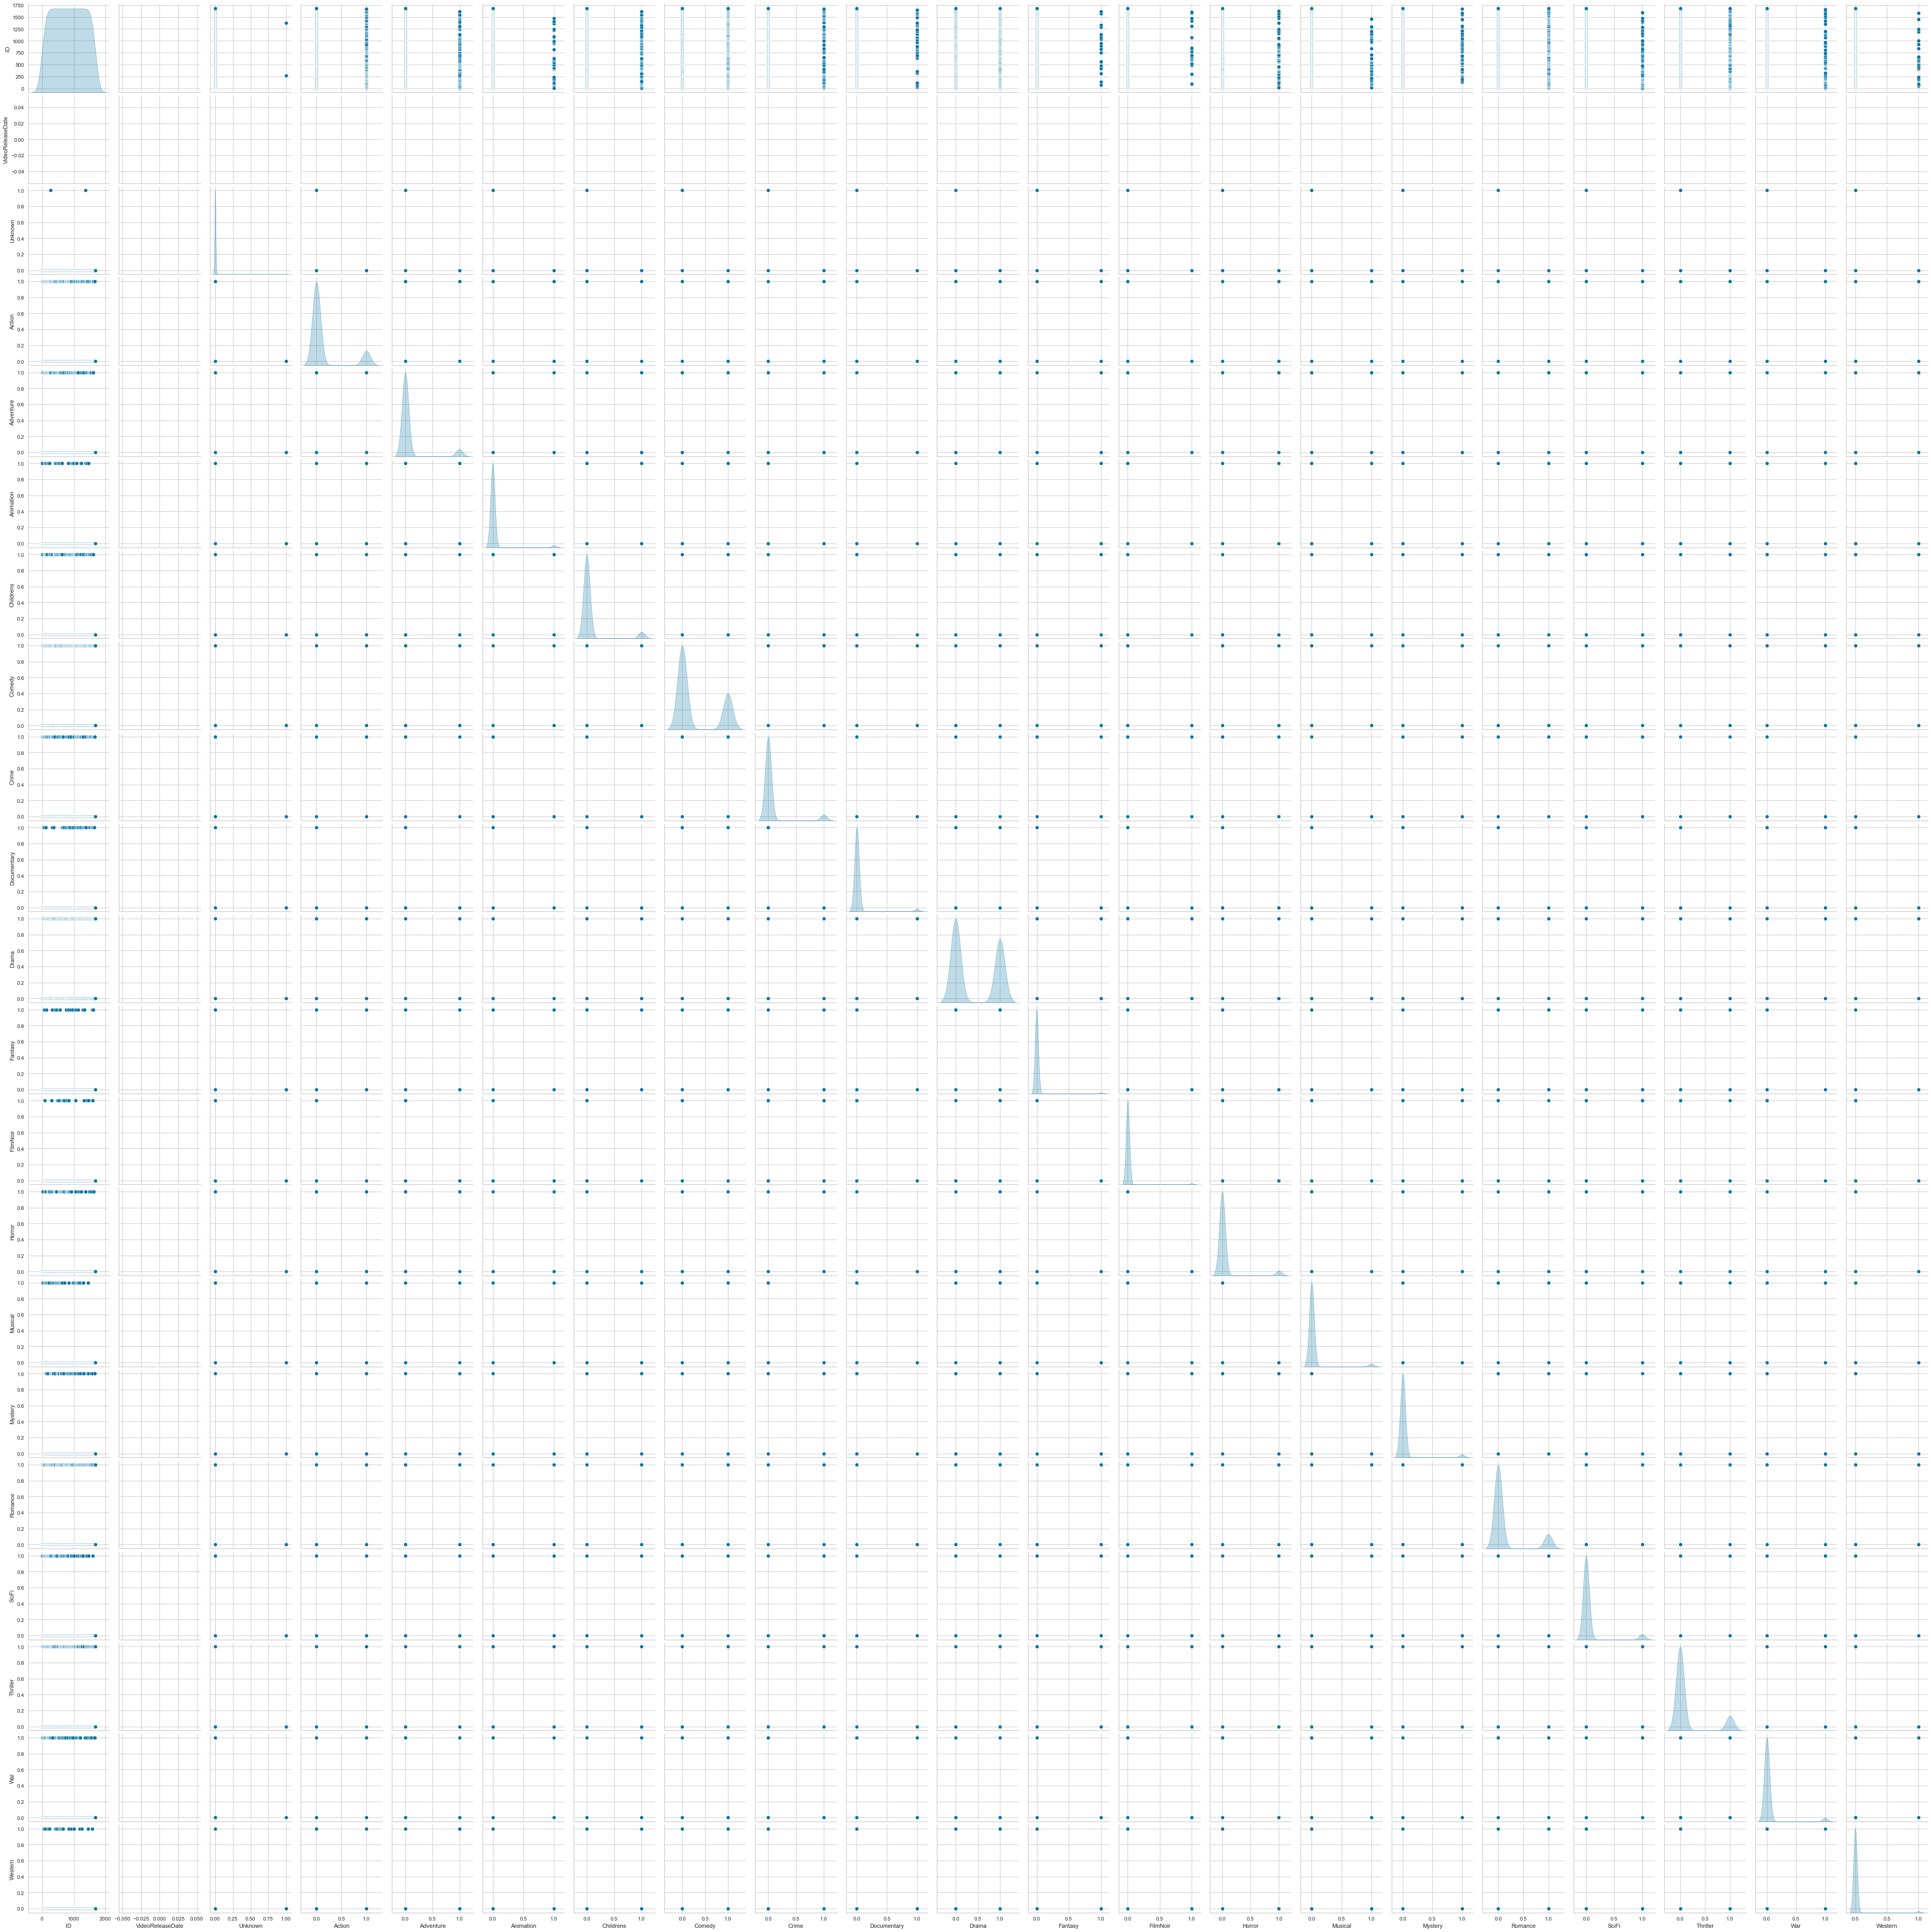

In [19]:
sns.pairplot(bank,diag_kind="kde")
plt.show()

TypeError: Vertical orientation requires numeric `y` variable.

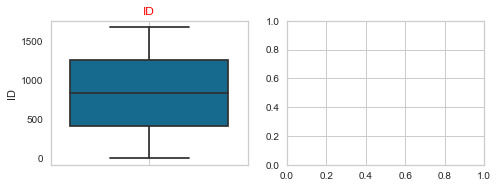

In [20]:
fig=plt.figure(figsize=(12,9))
for i in range(0,len(bank.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(y=bank[bank.columns[i]])
    ax.set_title(bank.columns[i],color='Red')
    plt.grid()
plt.tight_layout()


<h3> Outliers are identified and treated for columns probability_of_full_payment and min_payment_amt: <h3>
<h3> After treating outliers in the data : <h3>


<h2>1.2  Do you think scaling is necessary for clustering in this case? Justify</h2>
<br>
<h3>Solution:In the given dataset, although the weightage of variables is equal,there is difference in variance of variables.Thus scaling is required.</h3>

In [32]:
bank.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [34]:
from sklearn.preprocessing import StandardScaler 
X = StandardScaler() 
sc_bank = X.fit_transform(bank)
print(color.BOLD+color.DARKCYAN+'Scaled  dataset:')
pd.DataFrame(sc_bank)

Scaled  dataset:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-1.731021,1.442253,-0.409327,NaN,1.133476,-0.034503,-0.418810,-0.295408,6.248809,3.575875,1.526661,-0.263238,-0.175035,-0.870388,-0.115122,-0.120313,-0.240544,-0.185581,-0.193987,-0.414880,-0.252752,-0.418810,-0.209933,-0.127727
1,-1.728962,-0.447260,-0.409327,NaN,-0.556044,-0.034503,2.387718,3.385153,-0.160030,-0.279652,-0.655024,-0.263238,-0.175035,-0.870388,-0.115122,-0.120313,-0.240544,-0.185581,-0.193987,-0.414880,-0.252752,2.387718,-0.209933,-0.127727
2,-1.726902,-0.578505,-0.409327,NaN,-0.680885,-0.034503,-0.418810,-0.295408,-0.160030,-0.279652,-0.655024,-0.263238,-0.175035,-0.870388,-0.115122,-0.120313,-0.240544,-0.185581,-0.193987,-0.414880,-0.252752,2.387718,-0.209933,-0.127727
3,-1.724843,-0.499341,-0.409327,NaN,-0.603900,-0.034503,2.387718,-0.295408,-0.160030,-0.279652,1.526661,-0.263238,-0.175035,1.148913,-0.115122,-0.120313,-0.240544,-0.185581,-0.193987,-0.414880,-0.252752,-0.418810,-0.209933,-0.127727
4,-1.722783,-1.020155,-0.409327,NaN,-1.086620,-0.034503,-0.418810,-0.295408,-0.160030,-0.279652,-0.655024,3.798841,-0.175035,1.148913,-0.115122,-0.120313,-0.240544,-0.185581,-0.193987,-0.414880,-0.252752,2.387718,-0.209933,-0.127727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1.722783,0.250631,0.099283,NaN,0.084809,-0.034503,-0.418810,-0.295408,-0.160030,-0.279652,-0.655024,-0.263238,-0.175035,1.148913,-0.115122,-0.120313,-0.240544,-0.185581,-0.193987,-0.414880,-0.252752,-0.418810,-0.209933,-0.127727
1678,1.724843,-1.505553,0.099283,NaN,-1.523565,-0.034503,-0.418810,-0.295408,-0.160030,-0.279652,-0.655024,-0.263238,-0.175035,-0.870388,-0.115122,-0.120313,-0.240544,-0.185581,-0.193987,2.410335,-0.252752,2.387718,-0.209933,-0.127727
1679,1.726902,1.063100,-0.352815,NaN,1.678617,-0.034503,-0.418810,-0.295408,-0.160030,-0.279652,-0.655024,-0.263238,-0.175035,1.148913,-0.115122,-0.120313,-0.240544,-0.185581,-0.193987,2.410335,-0.252752,-0.418810,-0.209933,-0.127727
1680,1.728962,1.719326,-0.428164,NaN,1.381078,-0.034503,-0.418810,-0.295408,-0.160030,-0.279652,1.526661,-0.263238,-0.175035,-0.870388,-0.115122,-0.120313,-0.240544,-0.185581,-0.193987,-0.414880,-0.252752,-0.418810,-0.209933,-0.127727


***
<h2>1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.</h2>
<br>
<h3>Solution: Plotting dendograms </h3>



In [23]:
bank.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [33]:
for feature in bank.columns: 
    if bank[feature].dtype == 'object': 
        print('\n')
        print(color.BOLD+color.DARKCYAN+'Feature:',feature)
        print(color.BOLD+color.DARKCYAN,pd.Categorical(bank[feature].unique()))
        print(color.BOLD+color.DARKCYAN,pd.Categorical(bank[feature].unique()).codes)
        bank[feature] = pd.Categorical(bank[feature]).codes



Feature: Title
 ['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', 'Get Shorty (1995)', 'Copycat (1995)', ..., 'Sweet Nothing (1995)', 'Mat' i syn (1997)', 'B. Monkey (1998)', 'You So Crazy (1994)', 'Scream of Stone (Schrei aus Stein) (1991)']
Length: 1664
Categories (1664, object): [''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', ..., 'Young Poisoner's Handbook, The (1995)', 'Zeus and Roxanne (1997)', 'unknown', 'Á köldum klaka (Cold Fever) (1994)']
 [1523  616  553 ...  108 1656 1286]


Feature: ReleaseDate
 ['01-Jan-1995', '22-Jan-1996', '14-Aug-1995', '30-Oct-1995', '01-Jan-1994', ..., '26-Apr-1986', '18-Sep-1996', '06-Mar-1998', '28-Feb-1996', '30-Apr-1997']
Length: 241
Categories (240, object): ['01-Aug-1997', '01-Feb-1998', '01-Jan-1922', '01-Jan-1926', ..., '31-Jan-1997', '31-Jul-1996', '31-May-1996', '4-Feb-1971']
 [ 69 180 131 233  68 222  91 144 188 107  41  51  67  39  56 194  64  66
  65  11 132 106  44 226  70 133 

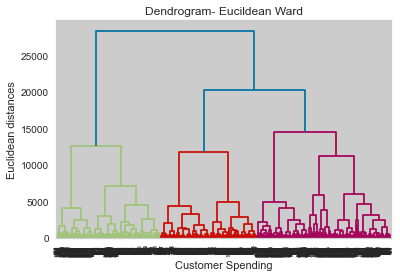

In [40]:
#Plotting dendograms 
x=pd.DataFrame(bank)



ward=sch.linkage(x, method = "ward", metric='euclidean')
dend = sch.dendrogram(ward)
plt.title('Dendrogram- Eucildean Ward') 
plt.xlabel('Customer Spending') 
plt.ylabel('Euclidean distances')
plt.show()



<h2> Obserations :</h2>
<br> Dendograms constructed with <b>Euclidean Single</b> method has <b>4 clusters.</b>
<br> Dendograms constructed with <b>Manhattan Single</b> method has <b>5 clusters.</b>
<br> Dendograms constructed with <b>Euclidean Complete</b> method has <b>4 clusters.</b>
<br> Dendograms constructed with <b>Manhattan Complete</b> method has <b>3 clusters.</b>
<br> Dendograms constructed with <b>Ward</b> method has <b>3 clusters.</b>

<h3>Truncated Cluster Dendogram with Ward Method:</h3>

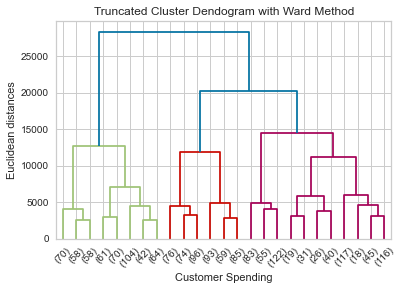

In [41]:
dend = dendrogram(ward,truncate_mode='lastp',p = 25)
plt.title('Truncated Cluster Dendogram with Ward Method') 
plt.xlabel('Customer Spending') 
plt.ylabel('Euclidean distances')
plt.show()

<h2>Result :</h2> <br>From above dendogram optimal number of clusters finalized are <b>3</b>.

In [20]:
clusters = fcluster(ward, 3, criterion='maxclust')
print(color.BOLD+color.DARKCYAN+'Array of clusters from Hierachical Clustering:')
clusters

Array of clusters from Hierachical Clustering:


array([1, 2, 2, ..., 1, 1, 1], dtype=int32)

In [348]:
#Extracting clustered data to csv
bank.to_csv('Hierachical_Wit.csv')

***
<h2>1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.</h2>
<br>

<h3>Solution : K-Means clustering is applied on scaled dataset sc_bank for cluster values from 2 to 8 to interpret values for Within sum of sqaures and between sum of squares.</h3>

<h3>Result:</h3>
<br>The between sum of squares is greater that within sum of clusters for all cluster sizes.Although there is no significant drop in within sum of cluster after k=3, hence <b>Cluster with size 3 is conidered as optimum</b> 

<h3> Applying Elbow method </h3>

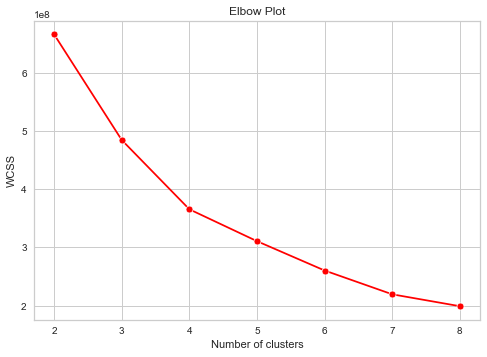

In [23]:

wcss = [] 
for i in range(2, 9): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) 
    kmeans.fit(bank) # inertia method returns wcss for that model 
    wcss.append(kmeans.inertia_)
wcss
sns.lineplot(range(2,9), wcss,marker='o',color='red') 
plt.title('Elbow Plot') 
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS') 
plt.show()

<h3>Result : Above plot not indicate any clear break in the elbow after k=3. Hence one option for optimum number of clusters is 3</h3>

<h3> Applying silhouette score method </h3>

For n_clusters = 2 The average silhouette_score is : 0.3821543832797922


TypeError: '(slice(None, None, None), 0)' is an invalid key

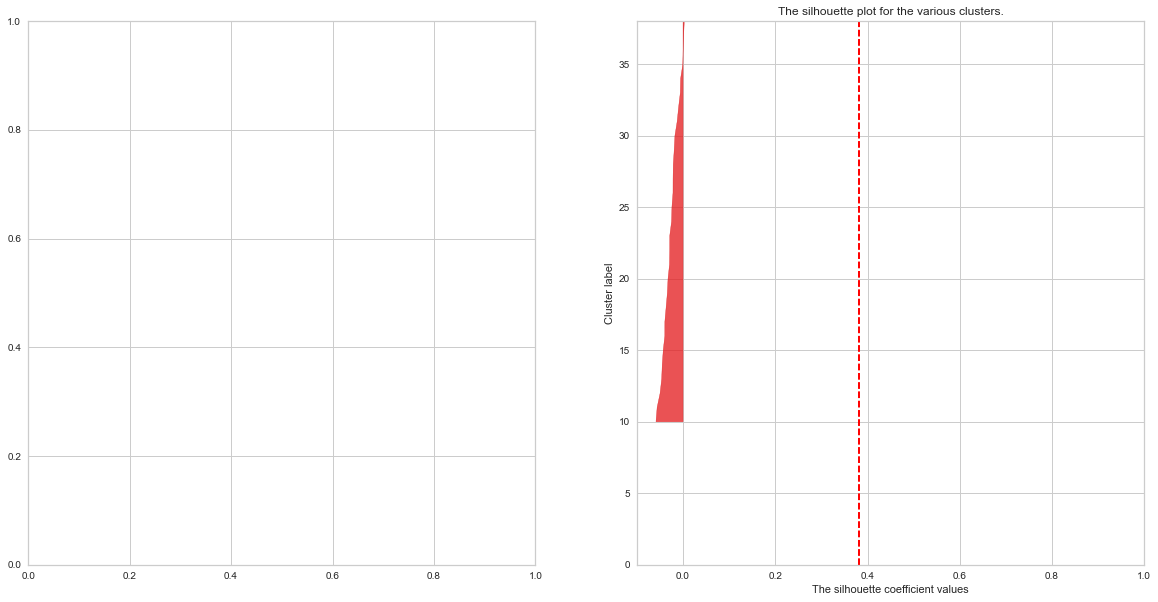

In [24]:
#Calculating and plotting silhouette_score
for n_clusters in range(2,9):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 10)
    
    
    ax2.set_xlim([-0.1, 1])
    ax2.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(bank)
    silhouette_avg = silhouette_score(bank, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(bank, cluster_labels)

    for i in range(n_clusters):
        vzr = SilhouetteVisualizer(clusterer)
        vzr.fit(bank)
    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")
  
    
    
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax1.scatter(bank[:, 0], bank[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax1.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax1.set_title("The visualization of the clustered data.")
    ax1.set_xlabel("Feature space for the 1st feature")
    ax1.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


<h3>Result:</h3>
It is clear from above data and visulisation of silhouette score and cluster distribution that <b>Cluster 3 (with silhouette score closet to 1) </b> is optimal for the data set, which was derived as per former clustering techniques used. </b>

In [25]:
k_means = KMeans(n_clusters=3, random_state=42)

In [27]:
k_means.fit(bank)
labels=k_means.labels_
print(color.BOLD+color.DARKCYAN+'Array of clusters from Kmeans Clustering:')
labels

Array of clusters from Kmeans Clustering:


array([0, 1, 1, ..., 2, 2, 2])

<h3>Appending clusters to original dataset:</h3>

In [28]:
#Appending clusters to original dataset
bank['Clusters']=labels
bank.head()

,ID,Title,ReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Clusters
0,1,1523,69,1375,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,616,69,563,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3,553,69,503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,4,591,69,540,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,5,341,69,308,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1


***
<h1> 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.</h1>

<h3>Comparison between hierachical clustering and k clustering with cluster size=3</h3>

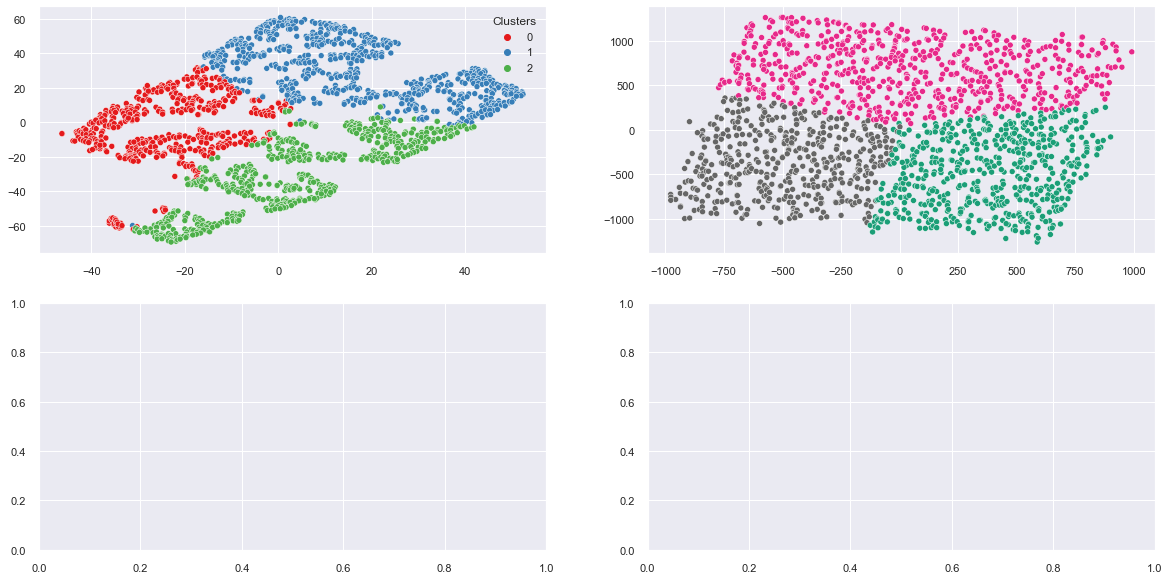

<Figure size 864x504 with 0 Axes>

In [32]:
from sklearn.manifold import TSNE

fig, axes = plt.subplots(2,2,figsize=(15,12))
fig.set_size_inches(20, 10)
tsne=TSNE()
visualization=tsne.fit_transform(bank)
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x=visualization[:,0],y=visualization[:,1],hue=bank['Clusters'],
               palette=sns.color_palette('Set1',3),ax=axes[0][0])


from sklearn.decomposition import PCA
pca_2 = PCA(2) 
plot_columns = pca_2.fit_transform(bank) 
plt.figure(figsize=(12,7)) 
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=3, random_state=42).fit(bank).labels_, palette='Dark2_r',legend=False,ax=axes[0][1]) 
plt.show()

<h3>Cluster Statistics:</h3>

In [30]:
bank.groupby('Clusters').describe()

ID                                                           \
          count         mean         std    min      25%     50%     75%   
Clusters                                                                   
0         471.0  417.227176   247.308596  1.0    211.50   398.0   626.5    
1         654.0  764.698777   452.922187  2.0    402.25   731.5   1127.0   
2         557.0  1290.441652  243.415909  750.0  1086.00  1309.0  1501.0   

                  Title                                                \
             max  count         mean         std  min     25%     50%   
Clusters                                                                
0         884.0   471.0  1177.467091  306.479728  8.0  971.00  1203.0   
1         1679.0  654.0  367.943425   221.901793  1.0  185.25  360.5    
2         1682.0  557.0  1080.795332  378.693710  0.0  836.00  1091.0   

                          ReleaseDate                                         \
              75%     max       count       mean        std  min   25%   50%   
Clusters                                                                       
0         1416.50  1662.0  471.0       85.770701  52.320112 -1.0  62.0  68.0   
1         540.75   1406.0  654.0       87.117737  51.834551  0.0  65.0  69.0   
2         1403.00  1663.0  557.0       99.163375  54.298504  0.0  68.0  71.0   

                         IMDB                                                \
            75%    max  count         mean         std  min     25%     50%   
Clusters                                                                      
0         95.5   234.0  471.0  1119.751592  277.947500 -1.0  905.50  1122.0   
1         104.0  239.0  654.0  337.362385   206.644508 -1.0  165.25  330.5    
2         128.0  236.0  557.0  1164.140036  338.934967 -1.0  871.00  1196.0   

                          Unknown                                          \
              75%     max   count      mean       std  min  25%  50%  75%   
Clusters                                                                    
0         1338.50  1659.0  471.0   0.002123  0.046078  0.0  0.0  0.0  0.0   
1         495.75   1139.0  654.0   0.001529  0.039103  0.0  0.0  0.0  0.0   
2         1475.00  1658.0  557.0   0.000000  0.000000  0.0  0.0  0.0  0.0   

              Action                                              Adventure  \
          max  count      mean       std  min  25%  50%  75%  max     count   
Clusters                                                                      
0         1.0  471.0  0.188960  0.391893  0.0  0.0  0.0  0.0  1.0  471.0      
1         1.0  654.0  0.162080  0.368806  0.0  0.0  0.0  0.0  1.0  654.0      
2         0.0  557.0  0.100539  0.300987  0.0  0.0  0.0  0.0  1.0  557.0      

                                                      Animation            \
              mean       std  min  25%  50%  75%  max     count      mean   
Clusters                                                                    
0         0.106157  0.308366  0.0  0.0  0.0  0.0  1.0  471.0     0.025478   
1         0.093272  0.291036  0.0  0.0  0.0  0.0  1.0  654.0     0.033639   
2         0.043088  0.203238  0.0  0.0  0.0  0.0  1.0  557.0     0.014363   

                                            Childrens                      \
               std  min  25%  50%  75%  max     count      mean       std   
Clusters                                                                    
0         0.157738  0.0  0.0  0.0  0.0  1.0  471.0     0.082803  0.275877   
1         0.180437  0.0  0.0  0.0  0.0  1.0  654.0     0.082569  0.275440   
2         0.119087  0.0  0.0  0.0  0.0  1.0  557.0     0.052065  0.222357   

                                  Comedy                                    \
          min  25%  50%  75%  max  count     mean       std  min  25%  50%   
Clusters                                                                     
0         0.0  0.0  0.0  0.0  1.0  471.0  0.29724  0.457529  0.

<h3> Recommendations: </h3>

1. Incresing credit limit for customers in clusters 0 is recommended to ensure they maintain or increse their spending.
2. Provide discount/benefits to customers primarily from Cluster 1 & Cluster 2 when min payment is done upto a certain amount or on full payment, which will increase their spending. Same offer can also be provided to Cluster 0 customers.
3. Customers from cluster 1 can be encourage on advance payments by providing them discounts/benefits  on advance payments.
4. Bank can co-brand with retailers to provide additional offers/discounts and benefits.
5. Offers can be provided on group purchases to Cluster 1 customers to encourage increse maximum spent in single shopping
6. EMI option can be provided to Cluster 2 customers primarily to encourage more purchase.
7. Loans and Balances: Potential clients in the low balance(Cluster 1 and CLuster 2) are more likely to have loans, so this group of customers can be chosen to recommend loans from banks. On the other hand Cluster 0 customers can be encouraged for term deposits in bank.



***
<h2><div style="text-align: Center">Problem Statement 1 Ends</div></h2>

<b>Problem Statement:</b> An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. 

## Objectives

Main task is to build CART, Random Forest and ANN model,choose the best suitable model and apply it to make predictions and make necessary recommendations. The following approach is suggested :

- Starting with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis .

- **Outlier Analysis:** Outlier Analysis is performed on the dataset to identify outliers and treat them.

-  Split the data into training and test data set.

- Build models(CART-RF-ANN) and compare paramaetrs such as Accurancy, Recall, Precision, F1 score to choose best suitable model.

- Fit the model to the dataset and provide recommendations.


In [357]:
#To perform CART-RF-ANN
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier



***
<h1><div style="text-align: Left">Analysis and Solutions</div></h1>


***
<h2>2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.</h2>
<br>
<h3>Solution:</h3>

In [358]:
#Data Loading
ins=pd.read_csv('insurance_part2_data.csv')
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [359]:
print(color.BOLD + color.DARKCYAN+'This datasets contains information on tour insurance  and their claiming status respectively.')

This datasets contains information on tour insurance  and their claiming status respectively.


<h2> Data Inspection </h2>

In [361]:
ins.info()
print("\n")
print("Check for null values:")
print(ins.isnull().sum())
print("\n")
print(color.BOLD + color.DARKCYAN+'Dataset has',ins.shape[0],'rows and',ins.shape[1],'columns.')
print(color.BOLD + color.DARKCYAN+'Dataset has 2 columns are of integer type,2 of float data type and 6 are of object data type.')
print(color.BOLD + color.DARKCYAN+'Dataset has no null values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


Check for null values:
Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64


Dataset has 3000 rows and 10 columns.
Dataset has 2 columns are of integer type,2 of float da

In [362]:
print(color.BOLD + color.DARKCYAN+"Number of duplicates in dataset :",ins.duplicated(['Age','Agency_Code','Type','Claimed','Commision','Channel','Duration','Sales','Product Name','Destination']).sum())

ins[ins.duplicated(subset=None)]

Number of duplicates in dataset : 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


<h3> Removing duplicates in data: </h3>

In [363]:
ins.drop_duplicates(keep=False,inplace=True)
print(color.BOLD + color.DARKCYAN+'Duplicates are removed')
print("Number of duplicates in dataset :",ins.duplicated(['Age','Agency_Code','Type','Claimed','Commision','Channel','Duration','Sales','Product Name','Destination']).sum())

Duplicates are removed
Number of duplicates in dataset : 0


In [364]:
print(color.BOLD+"Unique values per column in dataset :\n")
for column in ins[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 
                   'Duration', 'Sales', 'Product Name', 'Destination']]:
    print(color.BOLD + color.DARKCYAN,column.upper(),': ',ins[column].nunique())
    print(color.BOLD + color.DARKCYAN,ins[column].value_counts().sort_values())
    print('\n')

Unique values per column in dataset :

 AGE :  70
 8     1  
14    1  
83    1  
77    1  
84    1  
     ..  
30    86 
35    89 
48    106
31    123
36    810
Name: Age, Length: 70, dtype: int64


 AGENCY_CODE :  4
 JZI    239 
CWT    470 
C2B    902 
EPX    1161
Name: Agency_Code, dtype: int64


 TYPE :  2
 Airlines         1141
Travel Agency    1631
Name: Type, dtype: int64


 CLAIMED :  2
 Yes    904 
No     1868
Name: Claimed, dtype: int64


 COMMISION :  323
 29.00    1   
46.80    1   
21.35    1   
17.55    1   
34.13    1   
        ..   
54.00    57  
7.70     57  
17.82    57  
23.76    61  
0.00     1162
Name: Commision, Length: 323, dtype: int64


 CHANNEL :  2
 Offline    46  
Online     2726
Name: Channel, dtype: int64


 DURATION :  257
 4580    1 
149     1 
141     1 
215     1 
217     1 
       .. 
8       66
9       74
11      75
10      75
6       75
Name: Duration, Length: 257, dtype: int64


 SALES :  380
 267.3    1  
137.5    1  
188.0    1  
160.0    1  
205

<h3>One of the record in varaible Duration has a negavtive value. Duration of insurance cannot be thus imputing it with value 0 </h3>


In [365]:
ins.Duration = ins.Duration.replace(to_replace = -1, value =0)

<h3> Converting object variables to integers</h3>

In [366]:
for column in ins:
    if ins[column].dtype == 'object':
        ins[column] = pd.Categorical(ins[column]).codes 

In [367]:
print(color.BOLD+color.DARKCYAN+'Post performing EDA dataset statistics are as below :')
ins.describe(include="all")

Post performing EDA dataset statistics are as below :


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,38.286436,1.265873,0.588384,0.326118,15.406151,0.983405,73.232684,62.560188,1.669553,0.269841
std,10.814044,1.009349,0.492215,0.468876,26.035302,0.127769,137.078981,71.720700,1.288613,0.593529
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,21.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,5.940000,1.000000,29.000000,35.000000,2.000000,0.000000
75%,43.250000,2.000000,1.000000,1.000000,17.820000,1.000000,67.000000,69.300000,2.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


<h2>Exploratory Data Analytics</h2>

<Figure size 360x360 with 0 Axes>

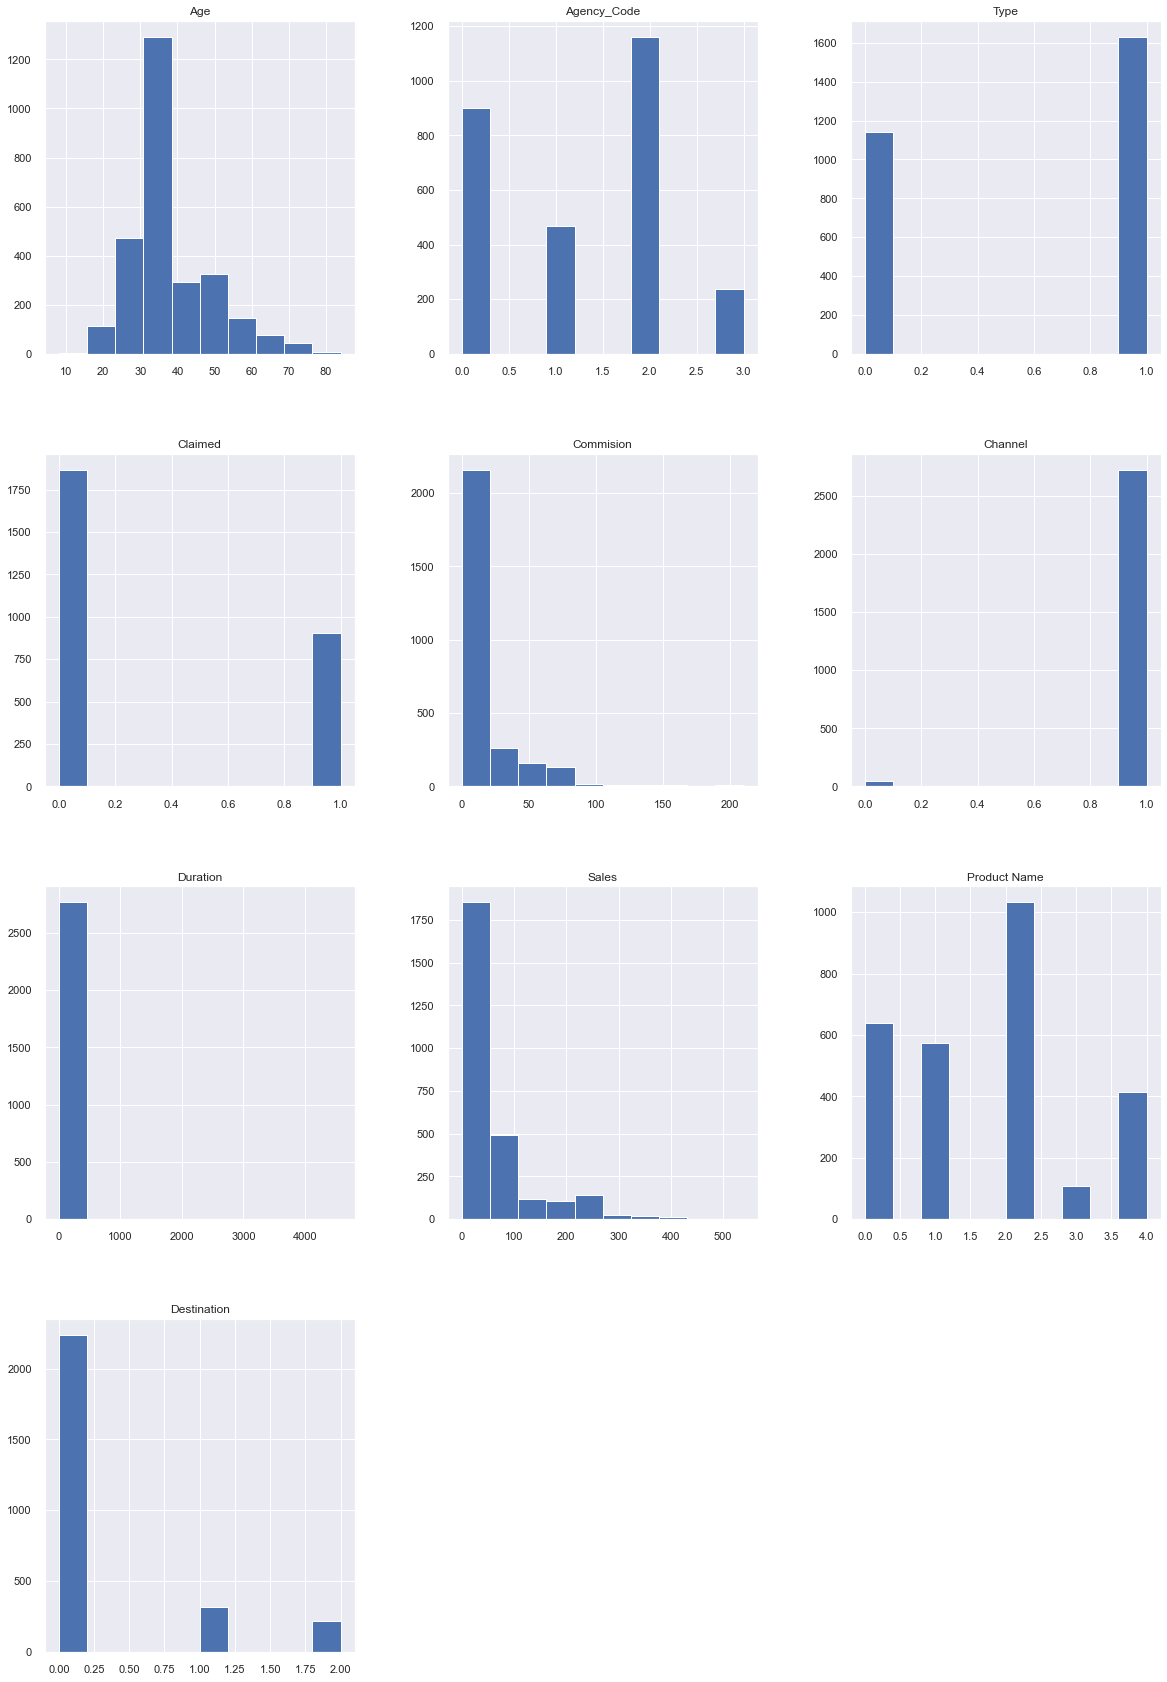

In [368]:
plt.tight_layout()
ins.hist(figsize=(20,30))
plt.show()

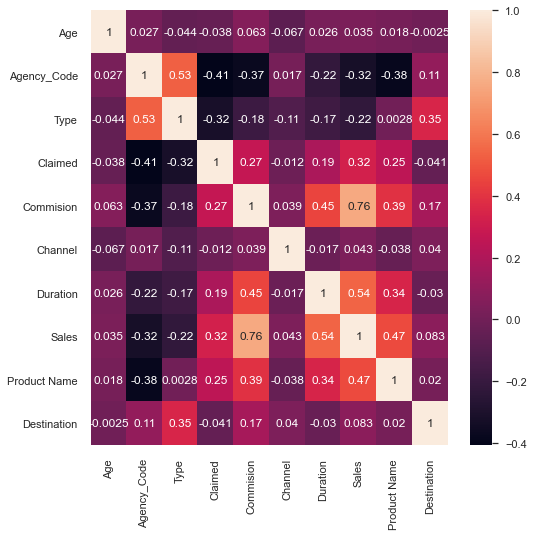

In [369]:
plt.figure(figsize = (8, 8))
sns.heatmap(ins.corr(), annot = True)
plt.show()

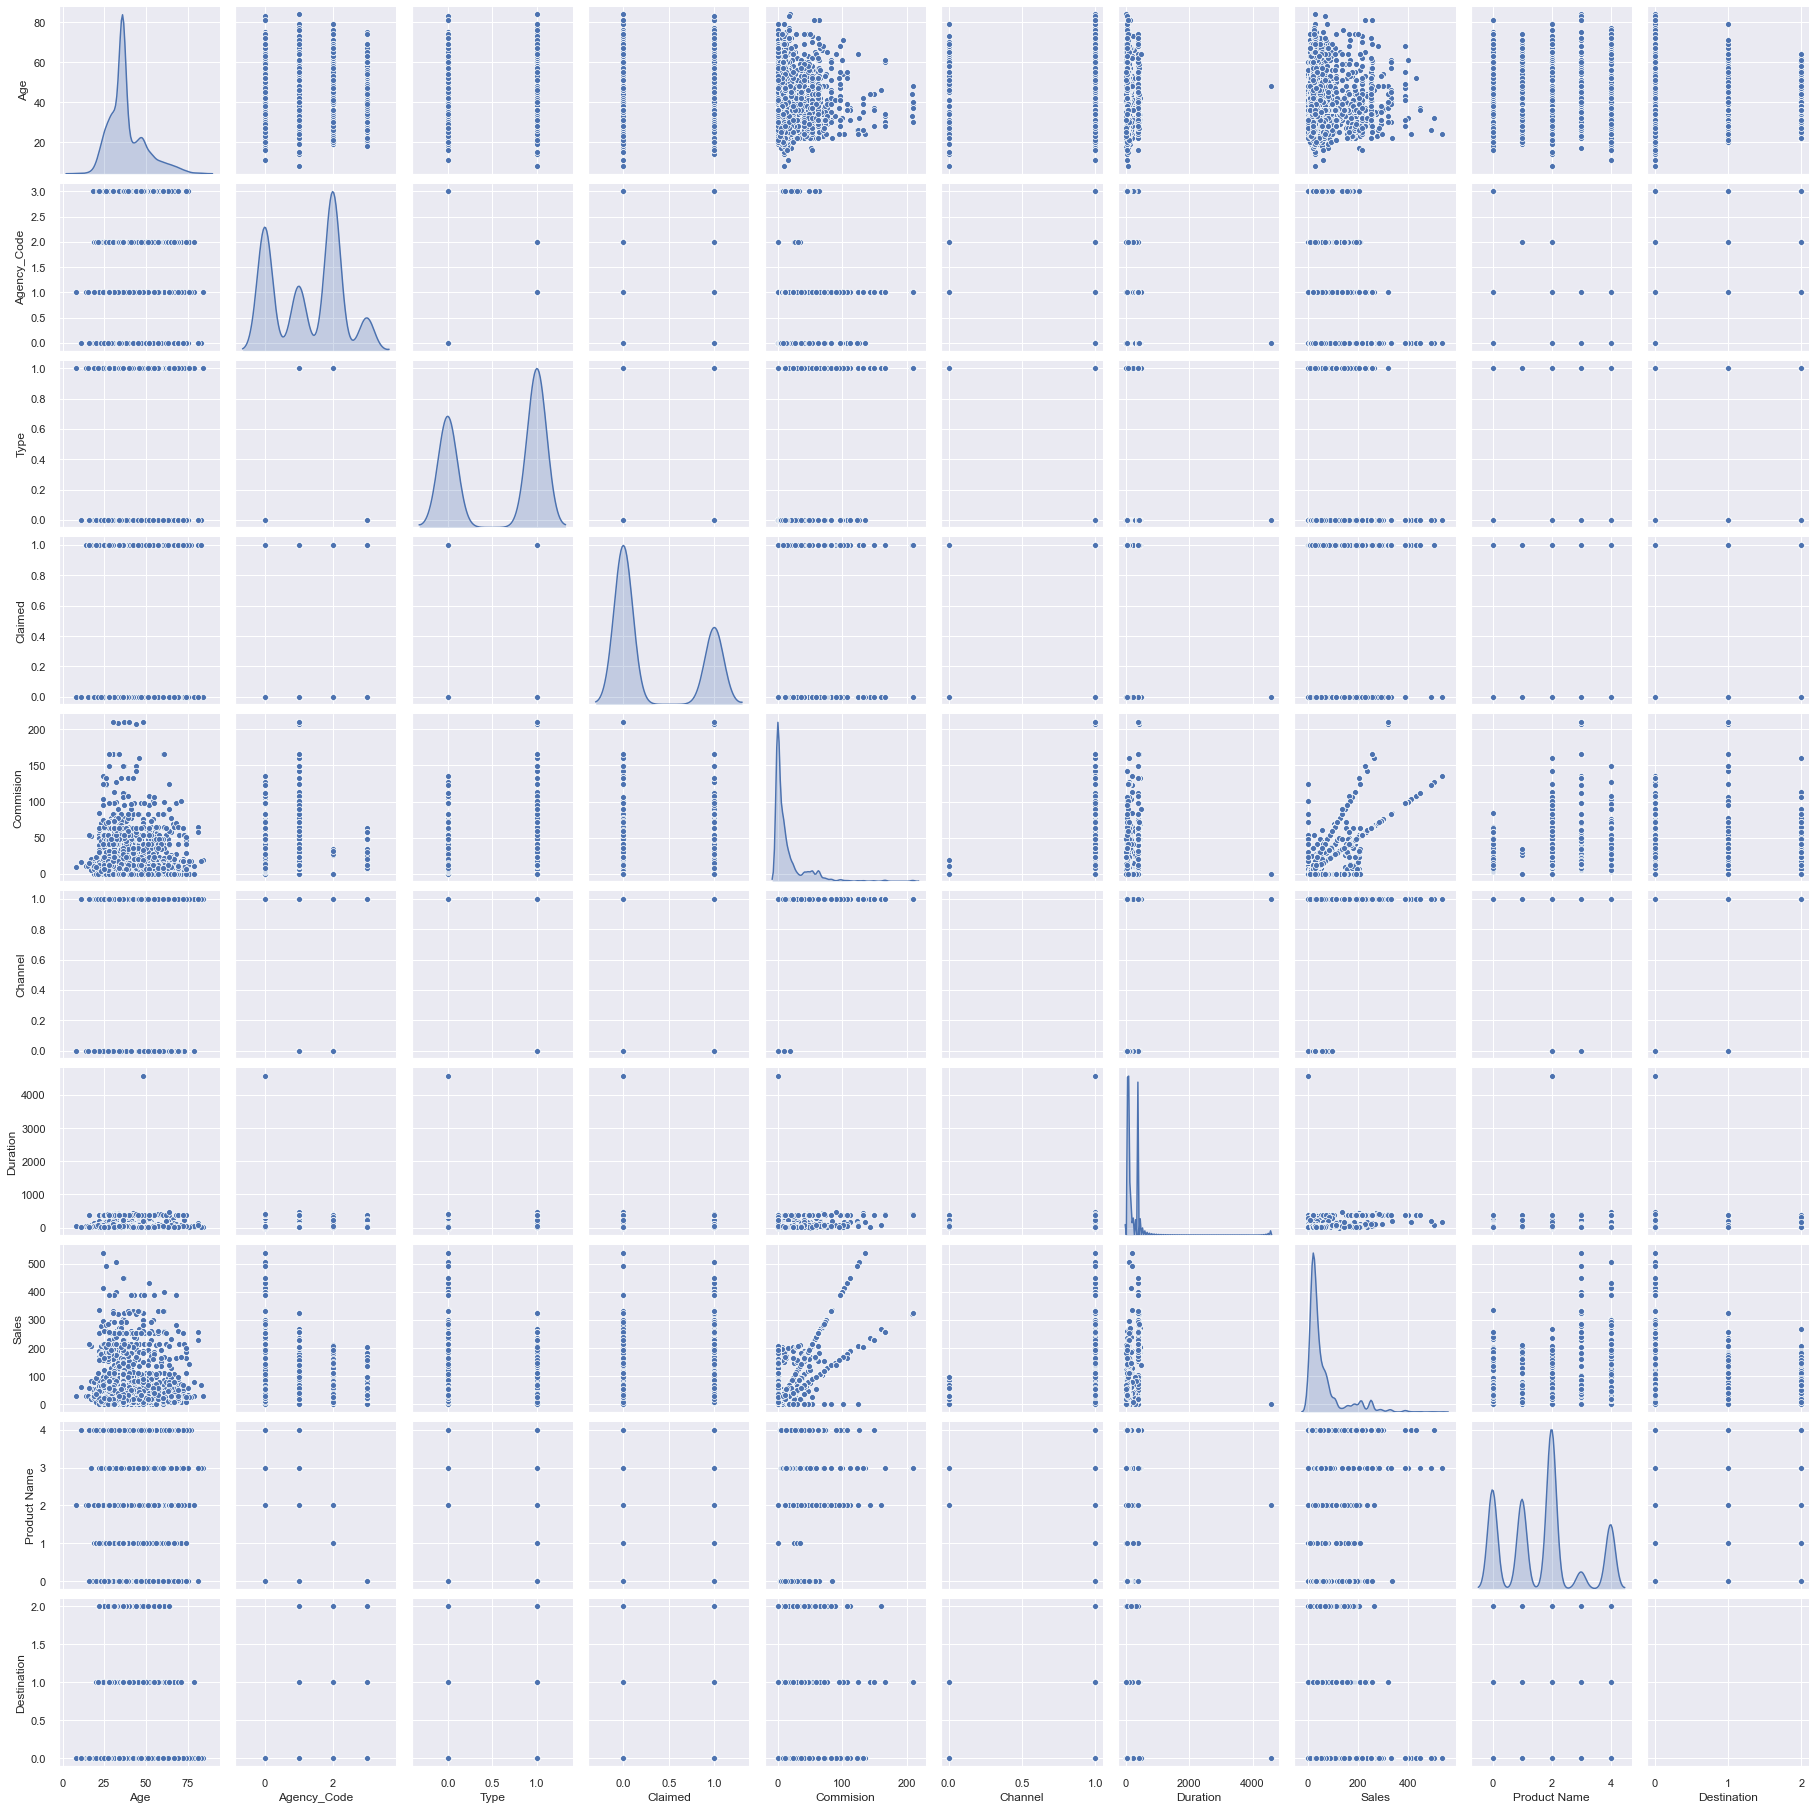

In [370]:
sns.pairplot(ins,diag_kind="kde")
plt.show()

<AxesSubplot:>

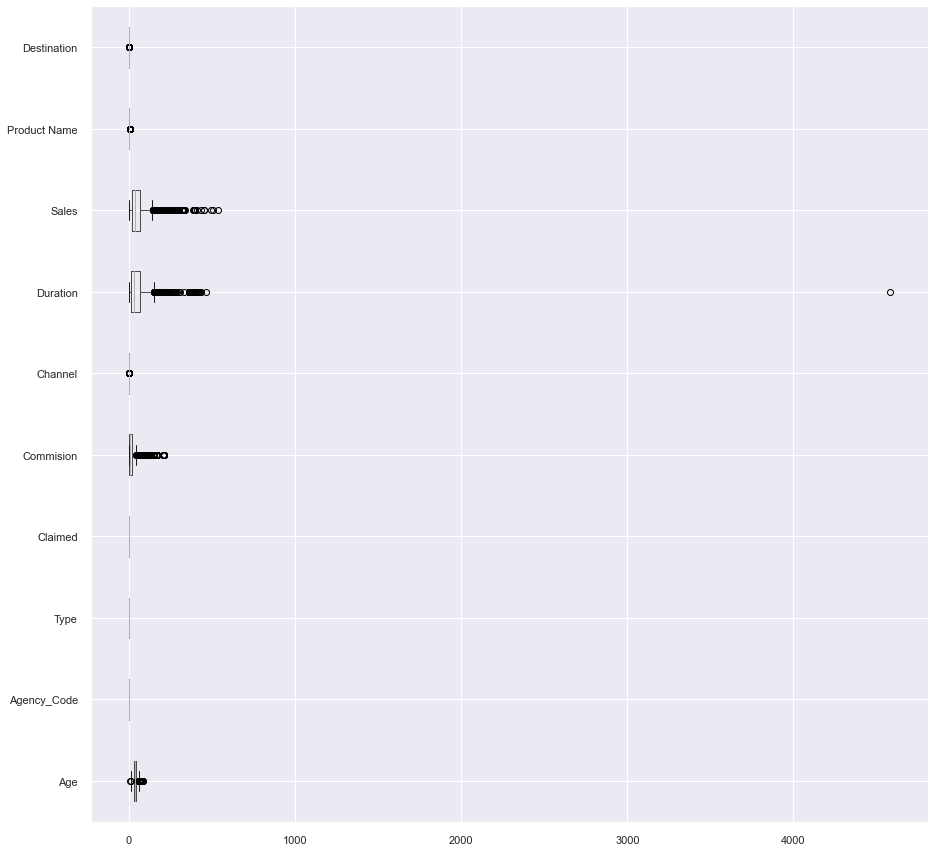

In [371]:
plt.figure(figsize=(15,15))
ins[['Age','Agency_Code','Type','Claimed','Commision','Channel','Duration','Sales','Product Name','Destination']].boxplot(vert=0)

<h3> Outliers are identified and treated for columns Age,Commision,Duration and Sales <h3>
<h3> After treating outliers in the data : <h3>

In [372]:
Q1=ins['Age'].quantile(0.25)
Q3=ins['Age'].quantile(0.75)
IQR=Q3-Q1
lr = Q1-1.5*IQR
ur = Q3+1.5*IQR
ins['Age']=np.where(ins['Age']>ur,ur,ins['Age'])
ins['Age']=np.where(ins['Age']<lr,lr,ins['Age'])
   

In [373]:
Q1=ins['Commision'].quantile(0.25)
Q3=ins['Commision'].quantile(0.75)
IQR=Q3-Q1
lr = Q1-1.5*IQR
ur = Q3+1.5*IQR
ins['Commision']=np.where(ins['Commision']>ur,ur,ins['Commision'])
ins['Commision']=np.where(ins['Commision']<lr,lr,ins['Commision'])

In [374]:
Q1=ins['Duration'].quantile(0.25)
Q3=ins['Duration'].quantile(0.75)
IQR=Q3-Q1
lr = Q1-1.5*IQR
ur = Q3+1.5*IQR
ins['Duration']=np.where(ins['Duration']>ur,ur,ins['Duration'])
ins['Duration']=np.where(ins['Duration']<lr,lr,ins['Duration'])

In [375]:
Q1=ins['Sales'].quantile(0.25)
Q3=ins['Sales'].quantile(0.75)
IQR=Q3-Q1
lr = Q1-1.5*IQR
ur = Q3+1.5*IQR
ins['Sales']=np.where(ins['Sales']>ur,ur,ins['Sales'])
ins['Sales']=np.where(ins['Sales']<lr,lr,ins['Sales'])

<AxesSubplot:>

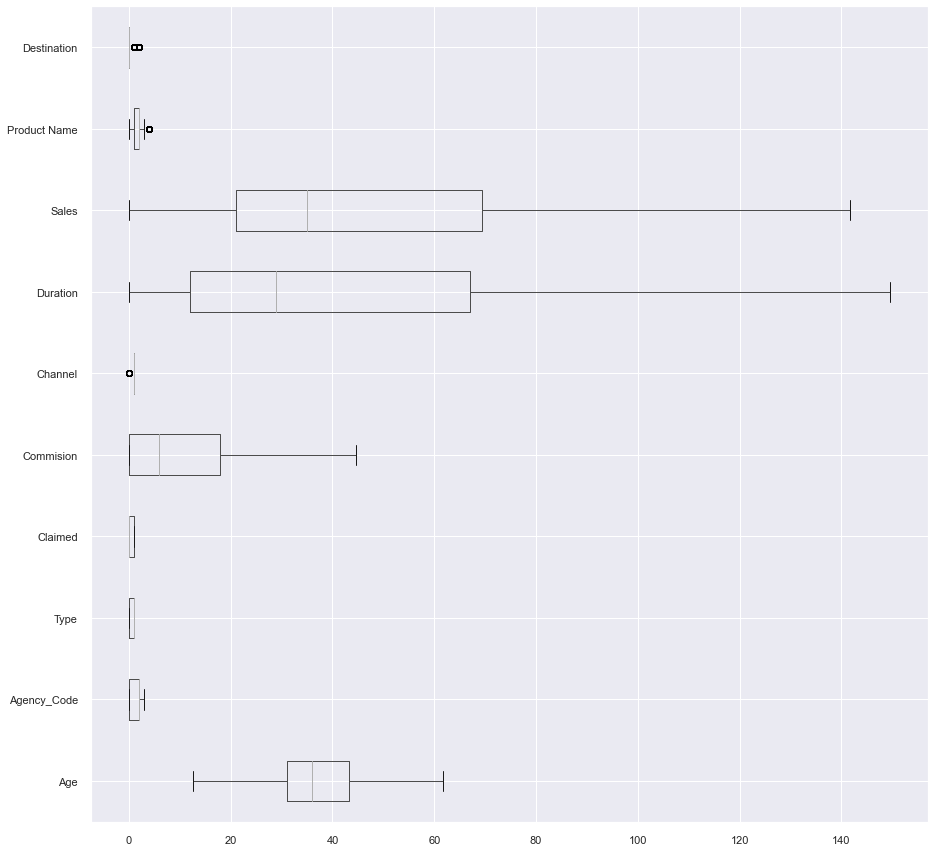

In [376]:
plt.figure(figsize=(15,15))
ins[['Age','Agency_Code','Type','Claimed','Commision','Channel','Duration','Sales','Product Name','Destination']].boxplot(vert=0)

***
<h2>2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.</h2>
<br>
<h3>Solution:</h3>



<b> Checking proportion Of 0's and 1's: </b>



In [377]:
print(color.BOLD+color.DARKCYAN,ins.Claimed.value_counts())
print('%1s',7721/(7721+3827))
print('%0s',3827/(7721+3827))

 0    1868
1    904 
Name: Claimed, dtype: int64
%1s 0.668600623484586
%0s 0.3313993765154139


<h3> Splitting data into train and test :</h3>

In [378]:
X = ins.drop("Claimed", axis=1)

y = ins.pop("Claimed")

In [379]:

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=42)


In [380]:
print(color.BOLD+color.DARKCYAN+'X_train',X_train.shape)
print(color.BOLD+color.DARKCYAN+'X_test',X_test.shape)
print(color.BOLD+color.DARKCYAN+'train_labels',train_labels.shape)
print(color.BOLD+color.DARKCYAN+'test_labels',test_labels.shape)

X_train (1940, 9)
X_test (832, 9)
train_labels (1940,)
test_labels (832,)


***
<h2>2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.</h2>
<br>
<h3>Solution:</h3>

<h3> CART model :</h3>

In [381]:
param_grid = {
    
    #Parameters used initially :
        #'max_depth': [3,5,8,9,10,15,20],
        # 'max_features': [4,6],
        #'min_samples_leaf': [5,10,20,30,50],
        #'min_samples_split': [20,30,50,100],
    
   #Parameters finalized after obtaining best parameters:

    'criterion': ['gini'],
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [3,5,10],
    'min_samples_split':[50,100,300]
    }

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [382]:
print(color.BOLD+color.DARKCYAN+'Parameter used to build Cart model:')
grid_search.fit(X_train, train_labels)

Parameter used to build Cart model:


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 7, 10],
                         'max_features': [4, 6], 'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [50, 100, 300]})

In [383]:
print(color.BOLD+color.DARKCYAN+'Parameter finzilzed and applied to build to Cart model:')
print(grid_search.best_params_)
best_grid_dt = grid_search.best_estimator_
best_grid_dt

Parameter finzilzed and applied to build to Cart model:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 100}


DecisionTreeClassifier(max_depth=5, max_features=6, min_samples_leaf=10,
                       min_samples_split=100)

In [384]:
## Generating Tree
train_char_label = ['No', 'Yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dt, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [385]:
print(color.BOLD+'Variable Importance:\n')
print (color.BOLD+color.DARKCYAN,pd.DataFrame(best_grid_dt.feature_importances_,columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


Variable Importance:

                    Imp
Product Name  0.677183
Agency_Code   0.146602
Sales         0.115369
Age           0.031618
Destination   0.010285
Duration      0.009624
Commision     0.009318
Type          0.000000
Channel       0.000000


<b>Predicting Train and Test data :</b>

In [386]:
ytrain_predict = best_grid_dt.predict(X_train)
ytest_predict = best_grid_dt.predict(X_test)

In [387]:
print(color.BOLD+color.DARKCYAN+'Getting the Predicted Classes and Probs:')
ytest_predict
ytest_predict_prob=best_grid_dt.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

Getting the Predicted Classes and Probs:


,0,1
0,0.924812,0.075188
1,0.434783,0.565217
2,0.354651,0.645349
3,0.924812,0.075188
4,0.193750,0.806250


## Model Evaluation


<b>Evaluating model performance on the training data :</b>

<b>AUC and ROC for the training data:</b>

AUC: 0.813


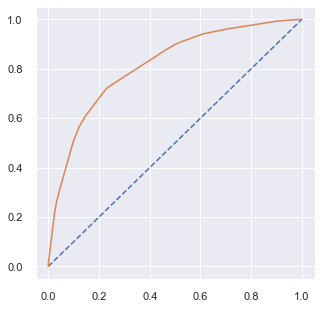

In [388]:
# predict probabilities
probs = best_grid_dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print(color.BOLD+color.DARKCYAN+'AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

Confusion matrix on the train data:


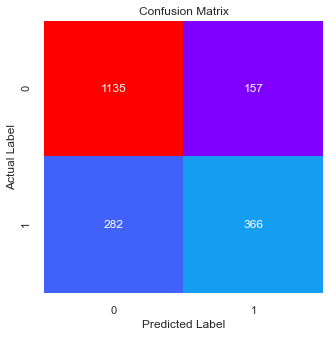

In [389]:
print(color.BOLD+color.DARKCYAN+'Confusion matrix on the train data:')
confusion_matrix(train_labels,ytrain_predict) #comparing actuals & predicted
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [390]:
print(color.BOLD+'Classification Report on the train data:\n')
print(color.BOLD+color.DARKCYAN+classification_report(train_labels,ytrain_predict))

Classification Report on the train data:

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1292
           1       0.70      0.56      0.63       648

    accuracy                           0.77      1940
   macro avg       0.75      0.72      0.73      1940
weighted avg       0.77      0.77      0.77      1940



In [391]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print(color.BOLD+'CART Train data metrices:\n')
print (color.BOLD+color.DARKCYAN+'CART Train Precision ',cart_train_precision)
print (color.BOLD+color.DARKCYAN+'CART Train Recall ',cart_train_recall)
print (color.BOLD+color.DARKCYAN+'CART Train F1 score ',cart_train_f1)

CART Train data metrices:

CART Train Precision  0.7
CART Train Recall  0.56
CART Train F1 score  0.63


<b>Evaluating model performance on the test data:</b>

<b>AUC and ROC for the test data:</b>

AUC: 0.801


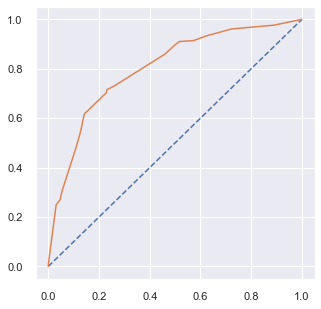

In [392]:
# predict probabilities
probs = best_grid_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print(color.BOLD+color.DARKCYAN+'AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

Confusion matrix on the test data:


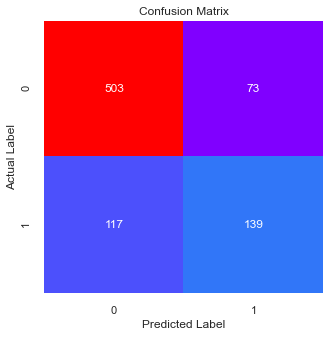

In [393]:
print(color.BOLD+color.DARKCYAN+'Confusion matrix on the test data:')
confusion_matrix(test_labels,ytest_predict) #comparing actuals & predicted
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [394]:
print(color.BOLD+'Classification Report on the test data:\n')
print(color.BOLD+color.DARKCYAN+classification_report(test_labels,ytest_predict))

Classification Report on the test data:

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       576
           1       0.66      0.54      0.59       256

    accuracy                           0.77       832
   macro avg       0.73      0.71      0.72       832
weighted avg       0.76      0.77      0.77       832



In [395]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print(color.BOLD+'CART Test data metrices:\n')
print (color.BOLD+color.DARKCYAN+'CART Test Precision',cart_test_precision)
print (color.BOLD+color.DARKCYAN+'CART Test Recall ',cart_test_recall)
print (color.BOLD+color.DARKCYAN+'CART Test F1 score ',cart_test_f1)

CART Test data metrices:

CART Test Precision 0.66
CART Test Recall  0.54
CART Test F1 score  0.59


In [396]:
#Train Data Accuracy
cart_train_acc=best_grid_dt.score(X_train,train_labels) 


In [397]:
#Test Data Accuracy
cart_test_acc=best_grid_dt.score(X_test,test_labels)


## Cart Conclusion

<b>Train Data:</b>  
    AUC: 81%        
    Accuracy: 77%             
    Precision: 70%        
    f1-Score: 63%       
            
<b>Test Data:</b>      
    AUC: 78%      
    Accuracy: 77%         
    Precision: 66%       
    f1-Score: 59%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Product Name is the most important variable for predicting insurance claim.

<h2>Random Forest :</h2>

In [398]:
param_grid = {
    
#Parameters used initially :

    #'max_depth': [5,10,15,20],
    #'max_features': [4,6,8,10],
    #'min_samples_leaf': [3,5,10],
    #'min_samples_split': [20,50,100],
    #'n_estimators': [100,200]

#Parameters finalized after obtaining best parameters:

'max_depth': [5,10,20],
    'max_features': [4,6],
    'min_samples_leaf': [4,6],
    'min_samples_split': [20,30,50],
    'n_estimators': [100]
}
rfcl = RandomForestClassifier(random_state=42)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)


In [399]:
print(color.BOLD+color.DARKCYAN+'Parameter used to build Cart model:')
grid_search_rfcl.fit(X_train, train_labels)

Parameter used to build Cart model:


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20], 'max_features': [4, 6],
                         'min_samples_leaf': [4, 6],
                         'min_samples_split': [20, 30, 50],
                         'n_estimators': [100]})

In [400]:
print(color.BOLD+color.DARKCYAN+'Parameter finzilzed and applied to build to Cart model:')

print(grid_search_rfcl.best_params_)
grid_search_rfcl=grid_search_rfcl.best_estimator_
grid_search_rfcl

Parameter finzilzed and applied to build to Cart model:
{'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 50, 'n_estimators': 100}


RandomForestClassifier(max_depth=5, max_features=6, min_samples_leaf=4,
                       min_samples_split=50, random_state=42)

In [401]:
print(color.BOLD+'Variable Importance:\n')
print (color.BOLD+color.DARKCYAN,pd.DataFrame(best_grid_dt.feature_importances_,columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


Variable Importance:

                    Imp
Product Name  0.677183
Agency_Code   0.146602
Sales         0.115369
Age           0.031618
Destination   0.010285
Duration      0.009624
Commision     0.009318
Type          0.000000
Channel       0.000000


<b>Predicting Train and Test data :</b>

In [402]:
rf_ytrain_predict = grid_search_rfcl.predict(X_train)
rf_ytest_predict = grid_search_rfcl.predict(X_test)

In [403]:
print(color.BOLD+color.DARKCYAN+'Getting the Predicted Classes and Probs:')

ytest_predict
ytest_predict_prob=grid_search_rfcl.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

Getting the Predicted Classes and Probs:


,0,1
0,0.910512,0.089488
1,0.383236,0.616764
2,0.504323,0.495677
3,0.896237,0.103763
4,0.276024,0.723976


## Model Evaluation


<b>Evaluating model performance on the training data :</b>

<b>AUC and ROC for the training data:</b>

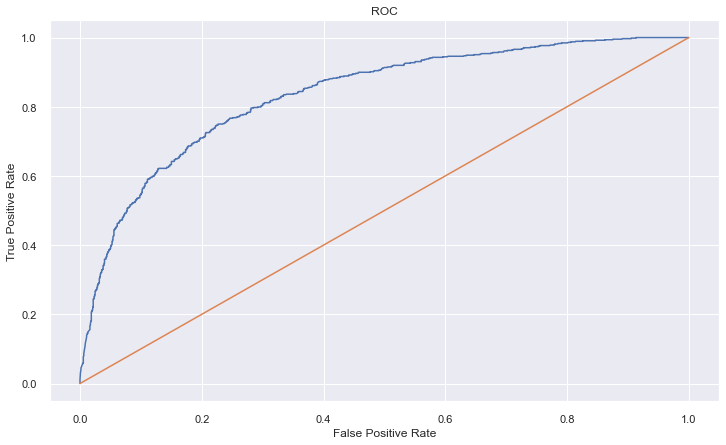

Area under Curve is 0.8344190746474028


In [404]:
rf_fpr, rf_tpr,_=roc_curve(train_labels,grid_search_rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
rf_train_auc=roc_auc_score(train_labels,grid_search_rfcl.predict_proba(X_train)[:,1])
print(color.BOLD+color.DARKCYAN+'Area under Curve is', rf_train_auc)

Confusion matrix on the train data:


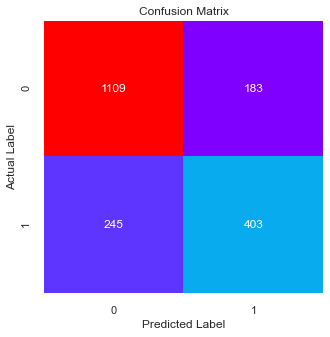

In [405]:
print(color.BOLD+color.DARKCYAN+'Confusion matrix on the train data:')
confusion_matrix(train_labels,rf_ytrain_predict) #comparing actuals & predicted
sns.heatmap(confusion_matrix(train_labels,rf_ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [406]:
print(color.BOLD+'Classification Report on the train data:\n')
print(color.BOLD+color.DARKCYAN+classification_report(train_labels,rf_ytrain_predict))

Classification Report on the train data:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1292
           1       0.69      0.62      0.65       648

    accuracy                           0.78      1940
   macro avg       0.75      0.74      0.75      1940
weighted avg       0.78      0.78      0.78      1940



In [407]:
rf_metrics=classification_report(train_labels, rf_ytrain_predict,output_dict=True)

df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print(color.BOLD+'Random Forest Train data metrices:\n')
print (color.BOLD+color.DARKCYAN+'RF Train Precision',rf_train_precision)
print (color.BOLD+color.DARKCYAN+'RF Train Recall',rf_train_recall)
print (color.BOLD+color.DARKCYAN+'RF Train F1 score ',rf_train_f1)

Random Forest Train data metrices:

RF Train Precision 0.69
RF Train Recall 0.62
RF Train F1 score  0.65


<b>Evaluating model performance on the test data:</b>

<b>AUC and ROC for the test data:</b>

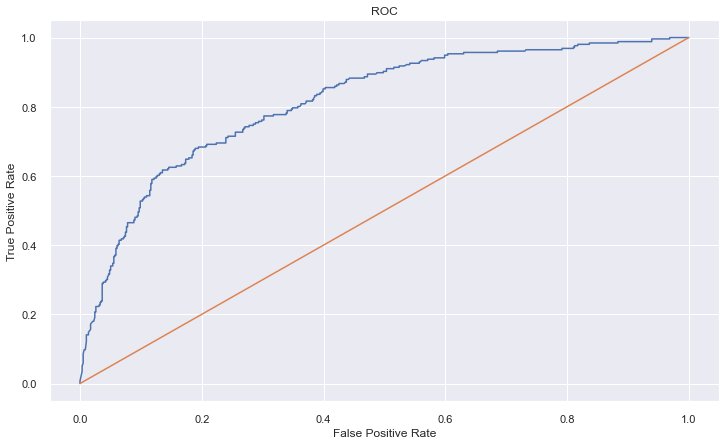

Area under Curve is 0.8147379557291667


In [408]:
rft_fpr, rft_tpr,_=roc_curve(test_labels,grid_search_rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rft_fpr,rft_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
rf_test_auc= roc_auc_score(test_labels,grid_search_rfcl.predict_proba(X_test)[:,1])
print(color.BOLD+color.DARKCYAN+'Area under Curve is',rf_test_auc)

Confusion matrix on the test data:


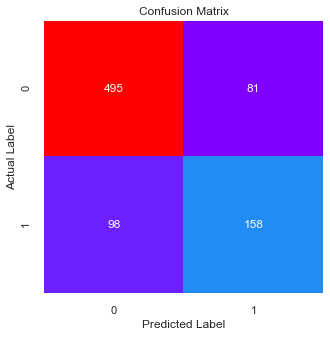

In [409]:
print(color.BOLD+color.DARKCYAN+'Confusion matrix on the test data:')
confusion_matrix(test_labels,rf_ytest_predict) #comparing actuals & predicted
sns.heatmap(confusion_matrix(test_labels,rf_ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

plt.show()

In [410]:
print(color.BOLD+'Classification Report on the test data:\n')
print(color.BOLD+color.DARKCYAN+classification_report(test_labels,rf_ytest_predict))

Classification Report on the test data:

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       576
           1       0.66      0.62      0.64       256

    accuracy                           0.78       832
   macro avg       0.75      0.74      0.74       832
weighted avg       0.78      0.78      0.78       832



In [411]:
rf_metrics=classification_report(test_labels, rf_ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print(color.BOLD+'Random Forest Test data metrices:\n')
print (color.BOLD+color.DARKCYAN+'RF Test Precision ',rf_test_precision)
print (color.BOLD+color.DARKCYAN+'RF Test Recall ',rf_test_recall)
print (color.BOLD+color.DARKCYAN+'RF Test F1 score ',rf_test_f1)

Random Forest Test data metrices:

RF Test Precision  0.66
RF Test Recall  0.62
RF Test F1 score  0.64


In [412]:
rf_test_acc=grid_search_rfcl.score(X_test,test_labels)

In [413]:
#Test Data Accuracy
rf_train_acc=grid_search_rfcl.score(X_test,test_labels)


## Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 83%        
    Accuracy: 78%           
    Precision: 69%        
    f1-Score: 65%       
            
<b>Test Data:</b>      
    AUC: 81%      
    Accuracy: 78%          
    Precision: 66%       
    f1-Score: 64%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Product Name is again the most important variable for predicting insurance claim.

<h3> Artificial Neural Network :</h3>

In [438]:
param_grid = {
  
    #Parameters used initially :
    
    #'hidden_layer_sizes' :[100,500,1000,1500],
    #'max_iter' :[200,500,1000],
    #'tol':[0.0001,0.1,0.01],
    
   #Parameters finalized after obtaining best parameters:
    
    'hidden_layer_sizes' :[500,1500],
    'max_iter' :[500,1500],
    'tol':[0.0001],
    
 }

clf = MLPClassifier(random_state=42)

grid_searchnn = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 10)

In [439]:
print(color.BOLD+color.DARKCYAN+'Parameter used to build ANN model:')
# Fit the model on the training data
grid_searchnn.fit(X_train, train_labels)

Parameter used to build ANN model:


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=42),
             param_grid={'hidden_layer_sizes': [500, 1500],
                         'max_iter': [500, 1500], 'tol': [0.0001]})

In [440]:
print(color.BOLD+color.DARKCYAN+'Parameter finzilzed and applied to build to ANN model:')
print(grid_searchnn.best_params_)
grid_searchnn.best_estimator_ 


Parameter finzilzed and applied to build to ANN model:
{'hidden_layer_sizes': 500, 'max_iter': 500, 'tol': 0.0001}


MLPClassifier(hidden_layer_sizes=500, max_iter=500, random_state=42)

In [441]:
# use the model to predict the training data
NN_train_pred = grid_searchnn.predict(X_train)
NN_test_pred = grid_searchnn.predict(X_test)

In [442]:
print(color.BOLD+color.DARKCYAN+'Getting the Predicted Classes and Probs:')
NN_test_pred
NN_test_pred_prob=best_grid_dt.predict_proba(X_test)
pd.DataFrame(NN_test_pred_prob).head()

Getting the Predicted Classes and Probs:


,0,1
0,0.924812,0.075188
1,0.434783,0.565217
2,0.354651,0.645349
3,0.924812,0.075188
4,0.193750,0.806250


## Model Evaluation

<b>Evaluating model performance on the training data :</b>

<b>AUC and ROC for the training data:</b>

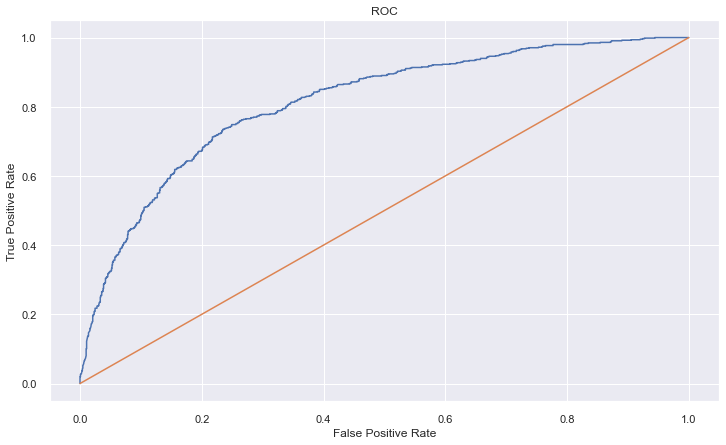

Area under Curve is 0.8118466441157359


In [443]:
from sklearn.metrics import roc_curve,roc_auc_score
nn_fpr,nn_tpr,_=roc_curve(train_labels,grid_searchnn.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(nn_fpr,nn_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
nn_train_auc=roc_auc_score(train_labels,grid_searchnn.predict_proba(X_train)[:,1])
print(color.BOLD+color.DARKCYAN+'Area under Curve is',nn_train_auc )

Confusion matrix on the train data:


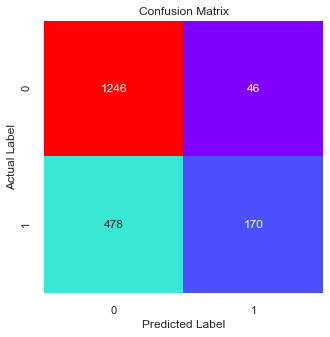

In [444]:
print(color.BOLD+color.DARKCYAN+'Confusion matrix on the train data:')
confusion_matrix(train_labels,NN_train_pred) #comparing actuals & predicted
sns.heatmap(confusion_matrix(train_labels,NN_train_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [445]:
nn_train_acc=grid_searchnn.score(X_train,train_labels)

In [446]:
print(color.BOLD+'Classification Report on the train data:\n')
print(color.BOLD+color.DARKCYAN+classification_report(train_labels,NN_train_pred))

Classification Report on the train data:

              precision    recall  f1-score   support

           0       0.72      0.96      0.83      1292
           1       0.79      0.26      0.39       648

    accuracy                           0.73      1940
   macro avg       0.75      0.61      0.61      1940
weighted avg       0.74      0.73      0.68      1940



In [447]:
nn_metrics=classification_report(train_labels, NN_train_pred,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print(color.BOLD+'ANN Train data metrices:\n')
print (color.BOLD+color.DARKCYAN+'ANN Train Data Precision ',nn_train_precision)
print (color.BOLD+color.DARKCYAN+'ANN Train Data Recall  ',nn_train_recall)
print (color.BOLD+color.DARKCYAN+'ANN Train Data F1 score  ',nn_train_f1)

ANN Train data metrices:

ANN Train Data Precision  0.79
ANN Train Data Recall   0.26
ANN Train Data F1 score   0.39


<b>Evaluating model performance on the test data:</b>

<b>AUC and ROC for the test data:</b>

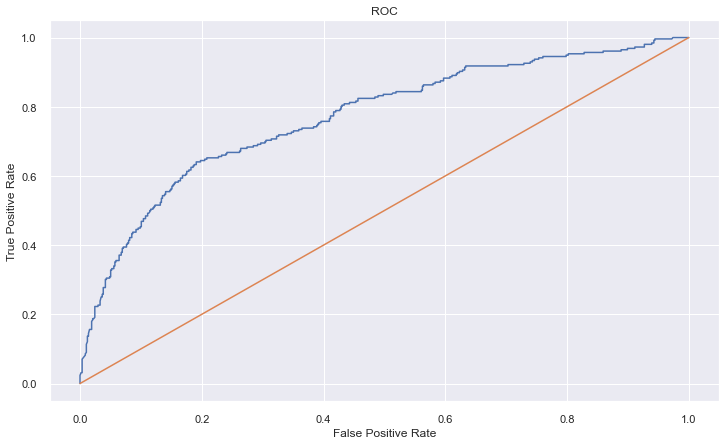

Area under Curve is 0.8118466441157359


In [448]:
from sklearn.metrics import roc_curve,roc_auc_score
nnt_fpr, nnt_tpr,_=roc_curve(test_labels,grid_searchnn.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(nnt_fpr,nnt_tpr, marker='x', label='ANN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
nn_test_auc=roc_auc_score(train_labels,grid_searchnn.predict_proba(X_train)[:,1])
print(color.BOLD+color.DARKCYAN+'Area under Curve is',nn_test_auc )

Confusion matrix on the test data:


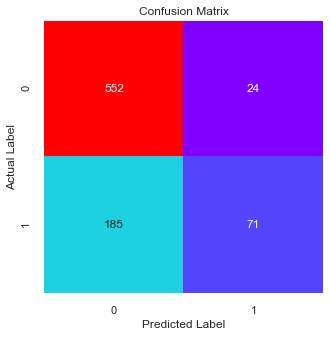

In [449]:
print(color.BOLD+color.DARKCYAN+'Confusion matrix on the test data:')
confusion_matrix(test_labels,NN_test_pred) #comparing actuals & predicted
sns.heatmap(confusion_matrix(test_labels,NN_test_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [450]:
nn_test_acc=grid_searchnn.score(X_test,test_labels)

In [451]:
print(color.BOLD+'Classification Report on the test data:\n')
print(color.BOLD+color.DARKCYAN+classification_report(test_labels,NN_test_pred))

Classification Report on the test data:

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       576
           1       0.75      0.28      0.40       256

    accuracy                           0.75       832
   macro avg       0.75      0.62      0.62       832
weighted avg       0.75      0.75      0.71       832



In [452]:
nn_metrics=classification_report(test_labels, NN_test_pred,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print(color.BOLD+'ANN Test data metrices:\n')
print (color.BOLD+color.DARKCYAN+'ANN Test Data Precision ',nn_test_precision)
print (color.BOLD+color.DARKCYAN+'ANN Test Data Recall ',nn_test_recall)
print (color.BOLD+color.DARKCYAN+'ANN Test Data F1 score ',nn_test_f1)

ANN Test data metrices:

ANN Test Data Precision  0.75
ANN Test Data Recall  0.28
ANN Test Data F1 score  0.4


## Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 81%        
    Accuracy: 73%          
    Precision: 79%        
    f1-Score: 39%     
            
<b>Test Data:</b>      
    AUC: 81%      
    Accuracy: 75%        
    Precision: 75%       
    f1-Score: 40%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  

***
<h2>2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized.</h2>
<br>
<h3>Solution:Metric represing comparision of all models :</h3>

In [431]:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.77,0.78,0.78,0.73,0.75
AUC,0.81,0.80,0.83,0.81,0.81,0.81
Recall,0.56,0.54,0.62,0.62,0.26,0.28
Precision,0.70,0.66,0.69,0.66,0.79,0.75
F1 Score,0.63,0.59,0.65,0.64,0.39,0.40


<b> ROC curve on training data for all models:</b>

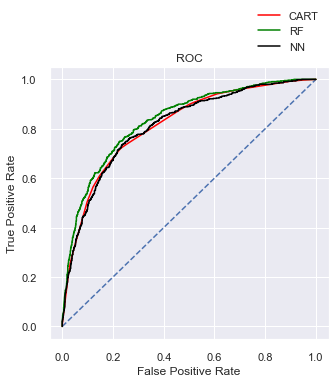

In [433]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_fpr,rf_tpr,color='green',label="RF")
plt.plot(nn_fpr,nn_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

<b> ROC curve on testing data for all models:</b>

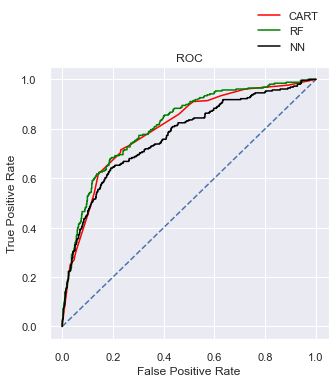

In [436]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rft_fpr,rft_tpr,color='green',label="RF")
plt.plot(nnt_fpr,nnt_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

<h2>Result</h2>
<br><b>
Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model.

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.
From Cart and Random Forest Model, the variable change is found to be the most useful feature amongst all other features for predicting if a person has diabetes or not. If change is yes, then those patients have more chances of getting diabetes.</b>

<h3> Recommendation: </h3>

Out of people claiming insurance, more people are claiming insurance 
  1. Online than offline.
  2. Travelling by airlines than through travel agencies.
  3. Using the customized plan
  4. Are in the age group of 30-40.

- Based on the above data, it is recommened for insurance companies to modify the customized plan to deal with higher frequency claim issue.
- Region, Age should also be considered while customizing the plan.

In [ ]:
<h3> Recommendation: </h3>

Out of people claiming insurance, more people are claiming insurance 
  1. Online than offline.
  2. Travelling by airlines than through travel agencies.
  3. Using the customized plan
  4. Are in the age group of 30-40.

- Based on the above data, it is recommened for insurance companies to modify the customized plan to deal with higher frequency claim issue.
- Region, Age should also be considered while customizing the plan.

<h2>End of Report</h2>